# Ejercicio de programación Regresión Lineal
# Dataset: "Calidad del vino blanco"

In [15]:
#Alumno: Mamani Acha Alvin Jairo.
#Carrera: Ing. De Sistemas.
#---------------------------------------------------------------------------------
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con varias variables

El archivo `Dataset/calidad del vino blanco.csv` contiene el dataset para el problema de regresion lineal. Las primeras 11 columnas indican en que medida estan presentes los componentes que conforman el vino blanco y la ultima columna indica la calidad que tiene el vino, en una nota que va del 0 al 10. 

In [16]:
# Leer datos separados por un punto y coma.
data = np.loadtxt(os.path.join('Dataset', 'calidad del vino blanco.csv'), delimiter=';')
X, y = data[:, :11], data[:, 11]

m = y.size  # m = numero de ejemplos de entrenamiento
print('Valores de X:')
print(X)
print('*'*50)
print('Valores de Y:')
print(y)
print('*'*50)
print('Valor de m:')
print(m)

Valores de X:
[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]
**************************************************
Valores de Y:
[6. 6. 6. ... 6. 7. 6.]
**************************************************
Valor de m:
4898


### 1.1 Trazar los datos

In [17]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Calidad del Vino Blanco')
    pyplot.xlabel('Componentes del Vino Blanco')


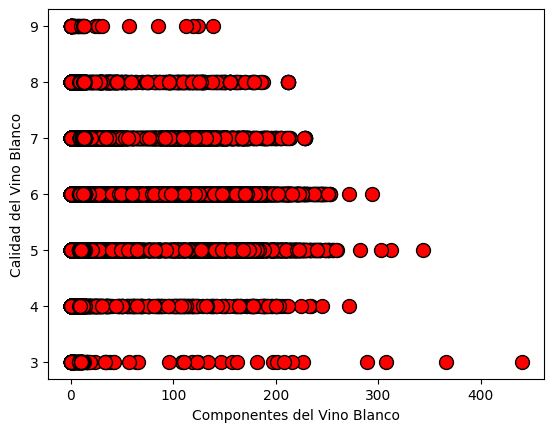

In [18]:
plotData(X, y)

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion 
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [19]:
# Normalizacion de los valores de X:

def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [20]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)
print('Valores de X:')
print(X)
print('*'*100)
print('Media calculada:', mu)
print('*'*100)
print('Desviación estandar calculada:', sigma)
print('*'*100)
print('Valores de X normalizada:')
print(X_norm)

Valores de X:
[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]
****************************************************************************************************
Media calculada: [6.85478767e+00 2.78241119e-01 3.34191507e-01 6.39141486e+00
 4.57723561e-02 3.53080849e+01 1.38360657e+02 9.94027376e-01
 3.18826664e+00 4.89846876e-01 1.05142670e+01]
****************************************************************************************************
Desviación estandar calculada: [8.43782079e-01 1.00784259e-01 1.21007450e-01 5.07153999e+00
 2.18457377e-02 1.70054011e+01 4.24937260e+01 2.99060158e-03
 1.50985184e-01 1.14114183e-01 1.23049494e+00]
****************************************************************************************************
Valores de X normalizada:
[[ 1.72

In [21]:
# Agrega una columna de unos a X:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [22]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento
   
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$. 

In [23]:
print('Ejemplo 01:')
J = computeCost(X, y, theta=np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ]))
print('Con theta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] \n Costo calculado = %.2f' % J)
print('*'*100)
print('Ejemplo 02:')
# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([5.8, -0.012, -0.019, 0.00015, 0.2, -0.018, 0.078, 0.029, -0.15, 0.047, 0.056, 0.37]))
print('Con theta = [5.8, -0.012, -0.019, 0.00015, 0.2, -0.018, 0.078, 0.029, -0.15, 0.047, 0.056, 0.37]\n Costo calculado = %.2f' % J)

Ejemplo 01:
Con theta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
 Costo calculado = 17.67
****************************************************************************************************
Ejemplo 02:
Con theta = [5.8, -0.012, -0.019, 0.00015, 0.2, -0.018, 0.078, 0.029, -0.15, 0.047, 0.056, 0.37]
 Costo calculado = 0.30


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso. 

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [24]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    
    # hace una copia de theta, para evitar cambiar la matriz original, 
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()
    
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

Theta encontrada por descenso gradiente:
[ 5.87790935e+00  1.10118640e-02 -1.92183368e-01  1.61364757e-04
  2.86528846e-01 -1.19686507e-02  7.14764843e-02 -2.13469360e-02
 -2.53053484e-01  6.71331658e-02  6.12486673e-02  3.30589756e-01]


Text(0, 0.5, 'Costo J')

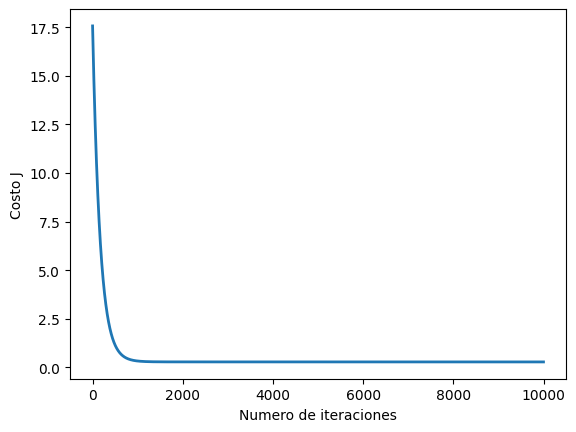

In [25]:
# inicializa los parametros de ajuste
theta = np.zeros(12)

# configuraciones para el descenso por el gradiente
#iterations = 150000
#alpha = 0.003
iterations = 10000
alpha = 0.003
theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)

print('Theta encontrada por descenso gradiente:')
print(theta)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Se utilizan los parametros finales para grafical la linea.

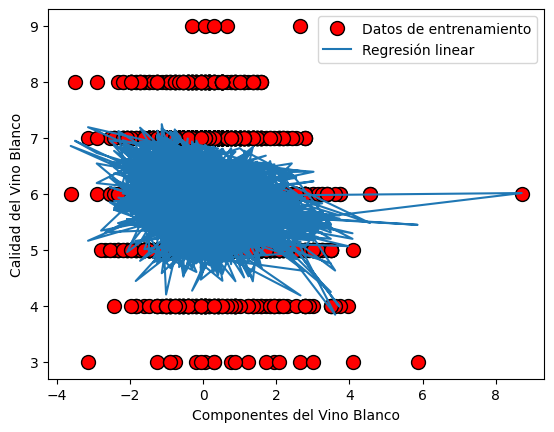

In [27]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [28]:
# Predecir valores:
predict1 = np.dot([1, 4.2, 0.10, 0.95, 10, 0.01, 20, 190, 1.0003, 4, 0.20, 6.1], theta)
print('Resultado de la prediccion 1: ')
print(predict1)
print('*'*50)

predict2 = np.dot([1, 5.7, 0.21, 0.32, 0.9, 0.038, 38, 121, 0.99074, 3.24, 0.46, 10.6], theta)
print('Resultado de la prediccion 2: ')
print(predict2)
print('*'*50)

Resultado de la prediccion 1: 
8.188125271182797
**************************************************
Resultado de la prediccion 2: 
9.790145457240694
**************************************************
